In [1]:
#Downloaded the dataset and Imported the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [3]:
df = pd.read_csv("D:/Churn_Modelling.csv")
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3165,3166,15581282,Lucchese,651,France,Female,39,6,0.00,1,1,0,24176.44,0
1998,1999,15779497,Ts'ai,603,France,Male,43,5,127823.93,1,1,1,19483.35,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9699,9700,15570145,Long,763,France,Female,23,2,0.00,2,1,0,153983.99,0
5076,5077,15720676,Bukowski,700,France,Female,37,7,0.00,2,1,0,17040.82,0
1688,1689,15804610,Valdez,601,France,Female,41,1,0.00,2,0,1,160607.06,0
5783,5784,15727041,Fiorentini,624,France,Male,71,7,0.00,2,1,1,108841.83,0
4400,4401,15567063,Manna,766,Germany,Female,34,6,106434.94,1,0,1,137995.66,1
8206,8207,15572415,Preston,580,France,Male,34,6,0.00,2,1,1,160095.31,0
9798,9799,15652981,Robinson,600,Germany,Male,30,2,119755.00,1,1,1,21852.91,0


In [4]:
#Checking for Null values and their Data types using Info() function.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Finding Number of Unique Values in each Feature.

In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
#Removing the columns of
#"Rownumber", "CustomerId", "Surname" from the dataset since they do NOT have any value to the classification analysis

In [10]:
df.drop('RowNumber',axis='columns',inplace=True)
df.drop('CustomerId',axis='columns',inplace=True)
df.drop('Surname',axis='columns',inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#Showing Statistics for the dataset as well as showing the Statistics for Balance variable alone with Exited and Non-Exited.

In [13]:
print("------Stats for the whole dataset--------")
df.describe()

------Stats for the whole dataset--------


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
#Balance Stats based on Exited and Non-Exited

In [15]:
Not_Exited=df[df.Exited==0]
Exited=df[df.Exited==1]

In [16]:
Not_Exited.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


In [18]:
Exited.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


[]

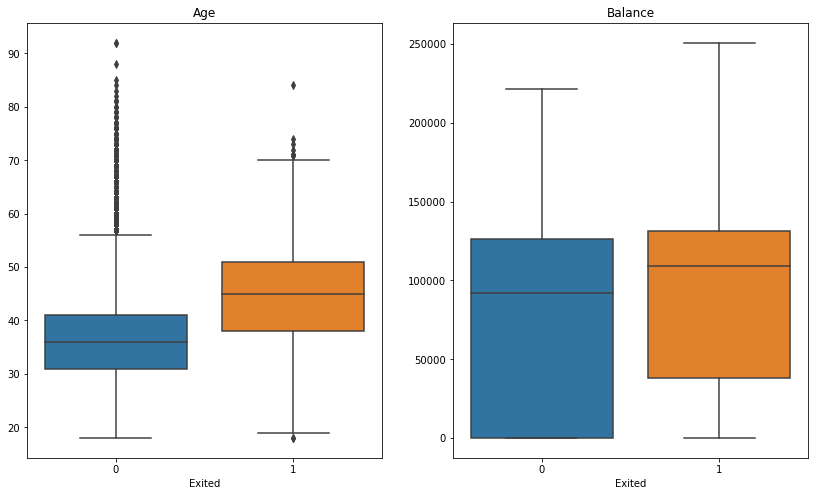

In [19]:
fig, axes = plt.subplots(1,2,figsize=(14,8))
valid_col = ['Age', 'Balance']
for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.boxplot(x='Exited', y=valid_col[i], data=df, ax=ax)
    ax.set_ylabel(None)
    ax.set_title(label=valid_col[i])
plt.plot()

In [20]:
#From the below scatterplot, we can clearly see that people with age above 40 have exited more.

<AxesSubplot:xlabel='Age', ylabel='Balance'>

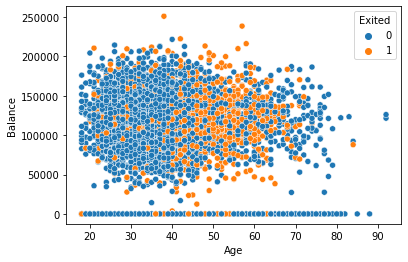

In [21]:
sns.scatterplot(data=df, x="Age", y="Balance", hue="Exited")

In [22]:
#Univariate Analysis

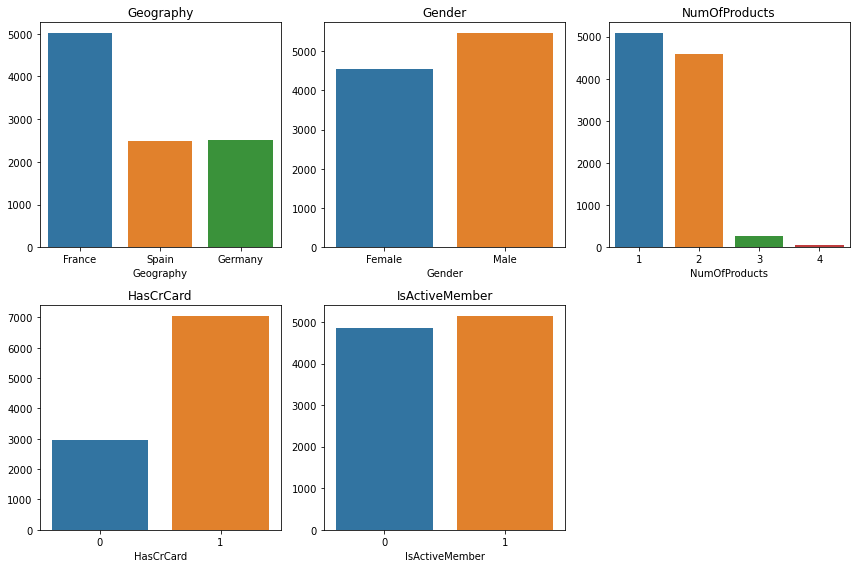

In [23]:
fig, axes = plt.subplots(2,3,figsize=(12,8))
valid_col =['Geography', 'Gender',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember']
for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.countplot(data=df,x=valid_col[i],ax=ax)
    ax.set_ylabel(None)
    ax.set_title(label=valid_col[i])
plt.tight_layout()

In [24]:
#Looking at the Value counts for the Target Variable

In [25]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [26]:
#We can see there is an imbalance in the dataset.
#From the below barchart, we can see the imabalance clearly.

C:\Users\91948\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


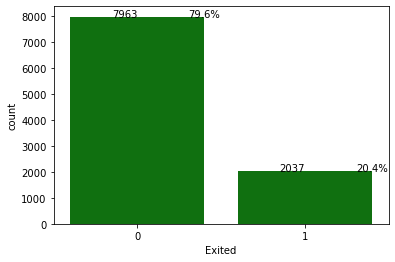

In [27]:
total=float(len(df))
df_exited=df[df['Exited']==1]
df_exited['Gender'].value_counts()
ax=sns.countplot(df['Exited'],color="Green")
for p in ax.patches:
        percent = '{:.1f}%'.format(100 * p.get_height()/total)
        x=p.get_x() + p.get_width()
        y=p.get_height()
        ax.annotate(percent,(x,y),ha='center')
        ax.annotate(y, (x - + p.get_width() +0.25, y+0.01))
plt.show()

In [28]:
#Bivariate Analysis

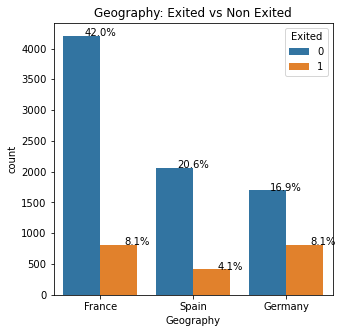

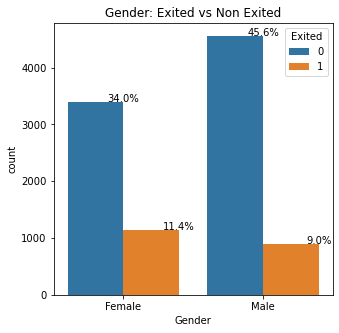

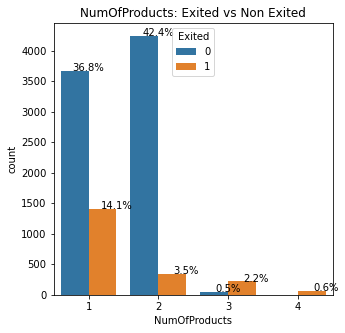

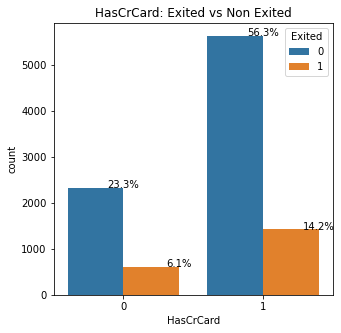

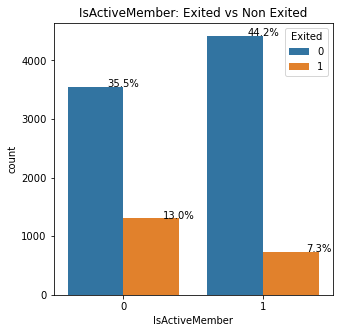

In [29]:
total=float(len(df))
Excepted_col=['Tenure','Age','CreditScore','Balance',"EstimatedSalary"]
Accepted_col=['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']
for column in Accepted_col:
    fig, ax = plt.subplots(figsize=(5,5))
    sns.countplot(data=df,x=column,hue='Exited',ax=ax)
    ax.set_title(column+': Exited vs Non Exited')
    ax.set_ylabel('count')
    for i in ax.patches:
        percent = '{:.1f}%'.format(100 * i.get_height()/total)
        x=i.get_x() + i.get_width()
        y=i.get_height()
        ax.annotate(percent,(x,y),ha='center')
    plt.show()

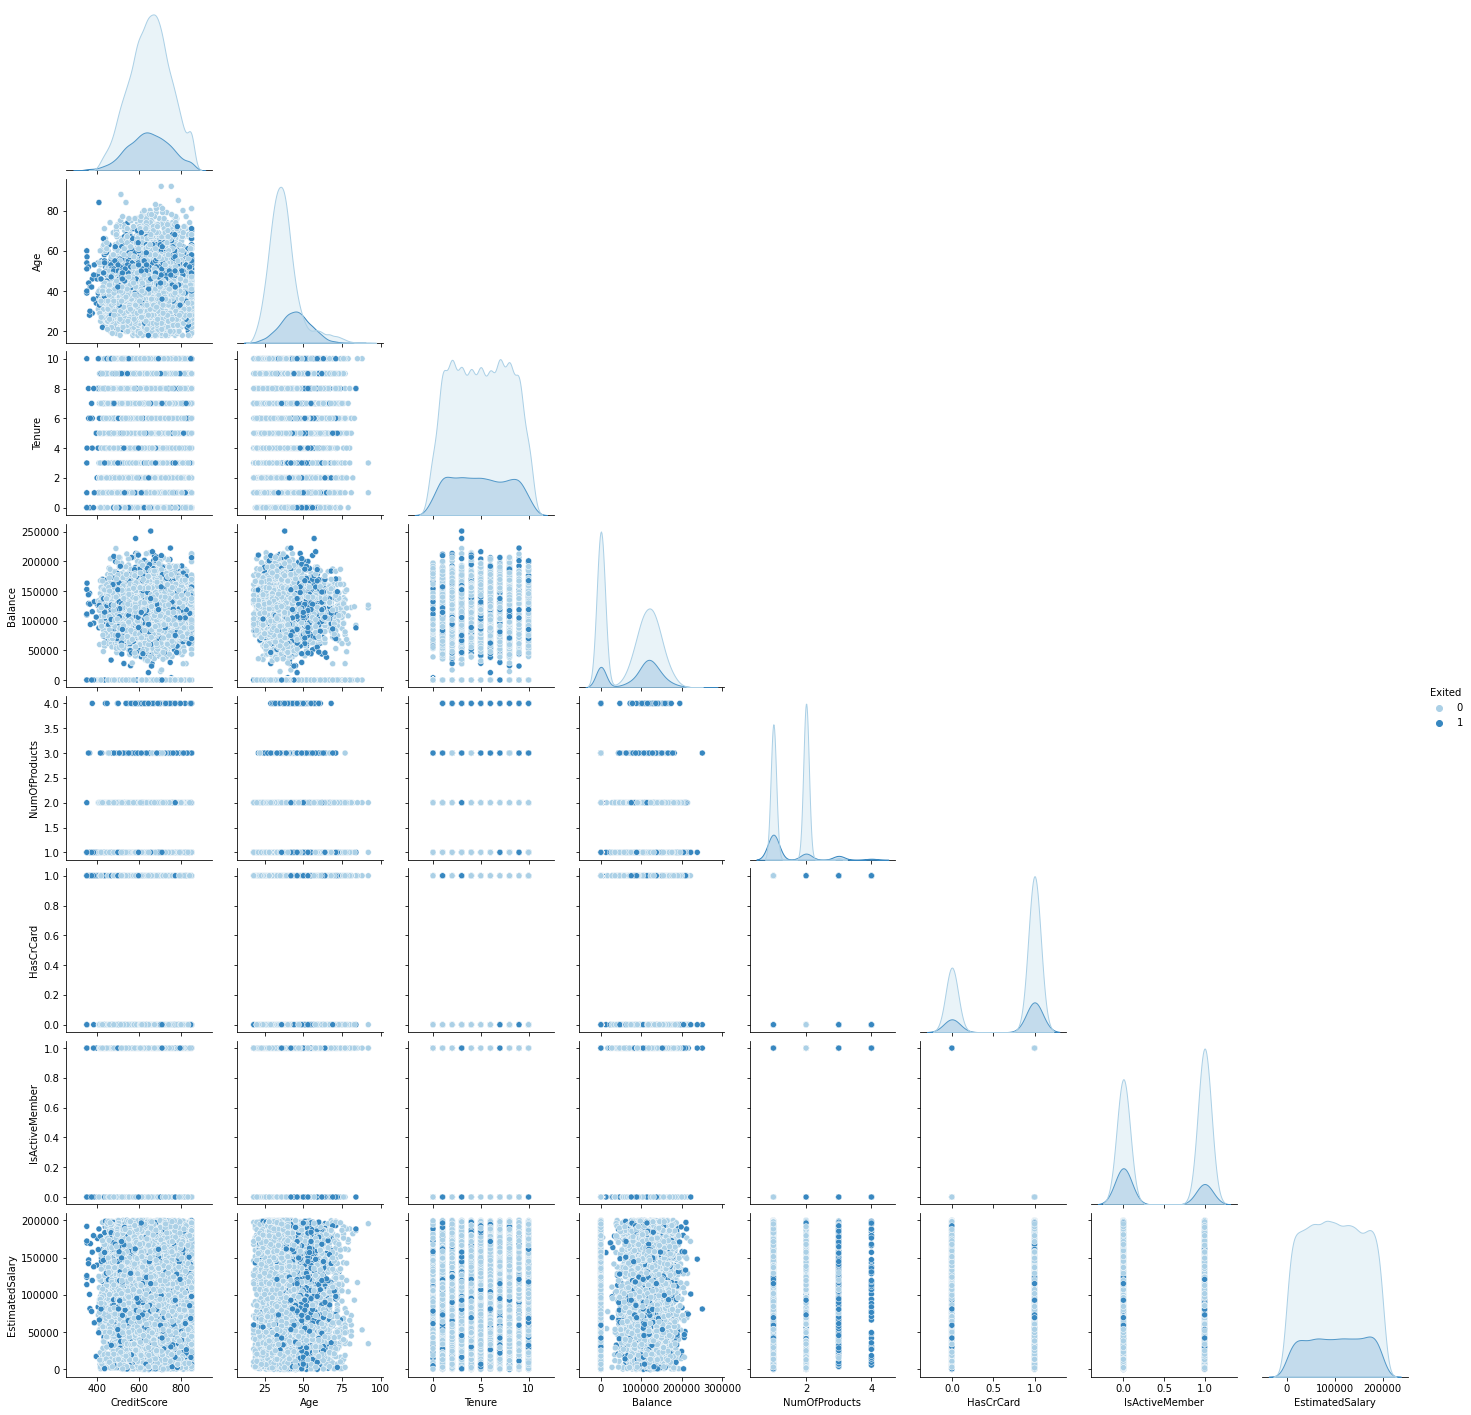

In [30]:
#PairPlot for reference
sns.pairplot(df, hue="Exited", palette="Blues", corner=True)

In [31]:
#Bivariate Analysis to understand each Numerical variables relation with target variable (Exited)

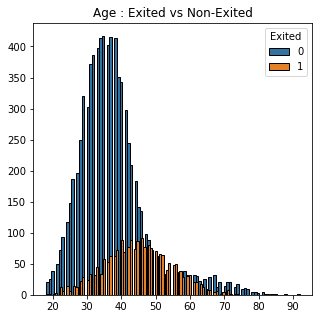

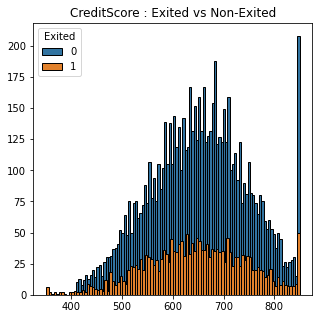

In [32]:
df_exited=df[df['Exited']==1]
df_not_exited=df[df['Exited']==0]
Excepted_col=['Age','CreditScore']
for column in Excepted_col:
    plt.figure(figsize=(5,5))
    plt.hist(x=column,bins=100,data=df_not_exited,edgecolor='black',color='#3274a1')
    plt.hist(x=column,bins=100,data=df_exited,edgecolor='black',color='#e1812c')
    plt.title(column+' : Exited vs Non-Exited')
    plt.legend([0,1],title='Exited')

In [33]:
#Using get_dummies for data manipulation of categorical variables.

In [34]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'],drop_first=True)
df_encoded.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [35]:
#Using Min-Max Scaler, scaling the numerical variables.

In [36]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

In [37]:
#Checking the values after encoding and scaling.

In [38]:
for col in df_encoded:
    print(f'{col}: {df_encoded[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [39]:
#Taking Target variable as "y" and all others as "X".

In [40]:
X = df_encoded.drop('Exited',axis='columns')
y = df_encoded['Exited']

In [41]:
#For Balancing the dataset, we use SMOTE - an oversampling technique.

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

#y_sm.value_counts()
X_sm.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,0,0,0
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,1,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,0,0,0
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,1,0


In [43]:
X_sm.shape

(15926, 11)

In [44]:
y_sm.shape

(15926,)

In [45]:
df_bal_smote = pd.concat([X_sm, y_sm], axis=1)
df_bal_smote.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,0,0,0,1
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,1,0,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,0,0,0,1
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,1,0,0
5,0.590,0.351351,0.8,0.453394,2,1,0,0.748797,0,1,1,1
6,0.944,0.432432,0.7,0.000000,2,1,1,0.050261,0,0,1,0
7,0.052,0.148649,0.4,0.458540,4,1,0,0.596733,1,0,0,1
8,0.302,0.351351,0.4,0.566170,2,0,1,0.374680,0,0,1,0
9,0.668,0.121622,0.2,0.536488,1,1,1,0.358605,0,0,1,0


In [46]:
#plotting again the balanced dataset

C:\Users\91948\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


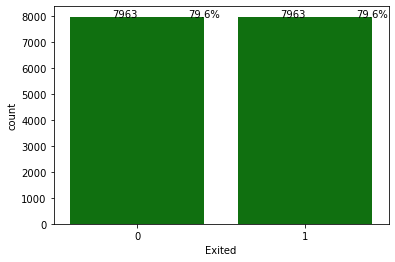

In [47]:
ax=sns.countplot(df_bal_smote['Exited'],color="Green")
for p in ax.patches:
    percent = '{:.1f}%'.format(100 * p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(percent,(x,y),ha='center')
    ax.annotate(y, (x - + p.get_width() +0.25, y+0.01))
plt.show()

In [48]:
#Doing Correlation Analysis with corr() function and visualizing them using heatmap. we do for both balanced and imbalanced dataset.

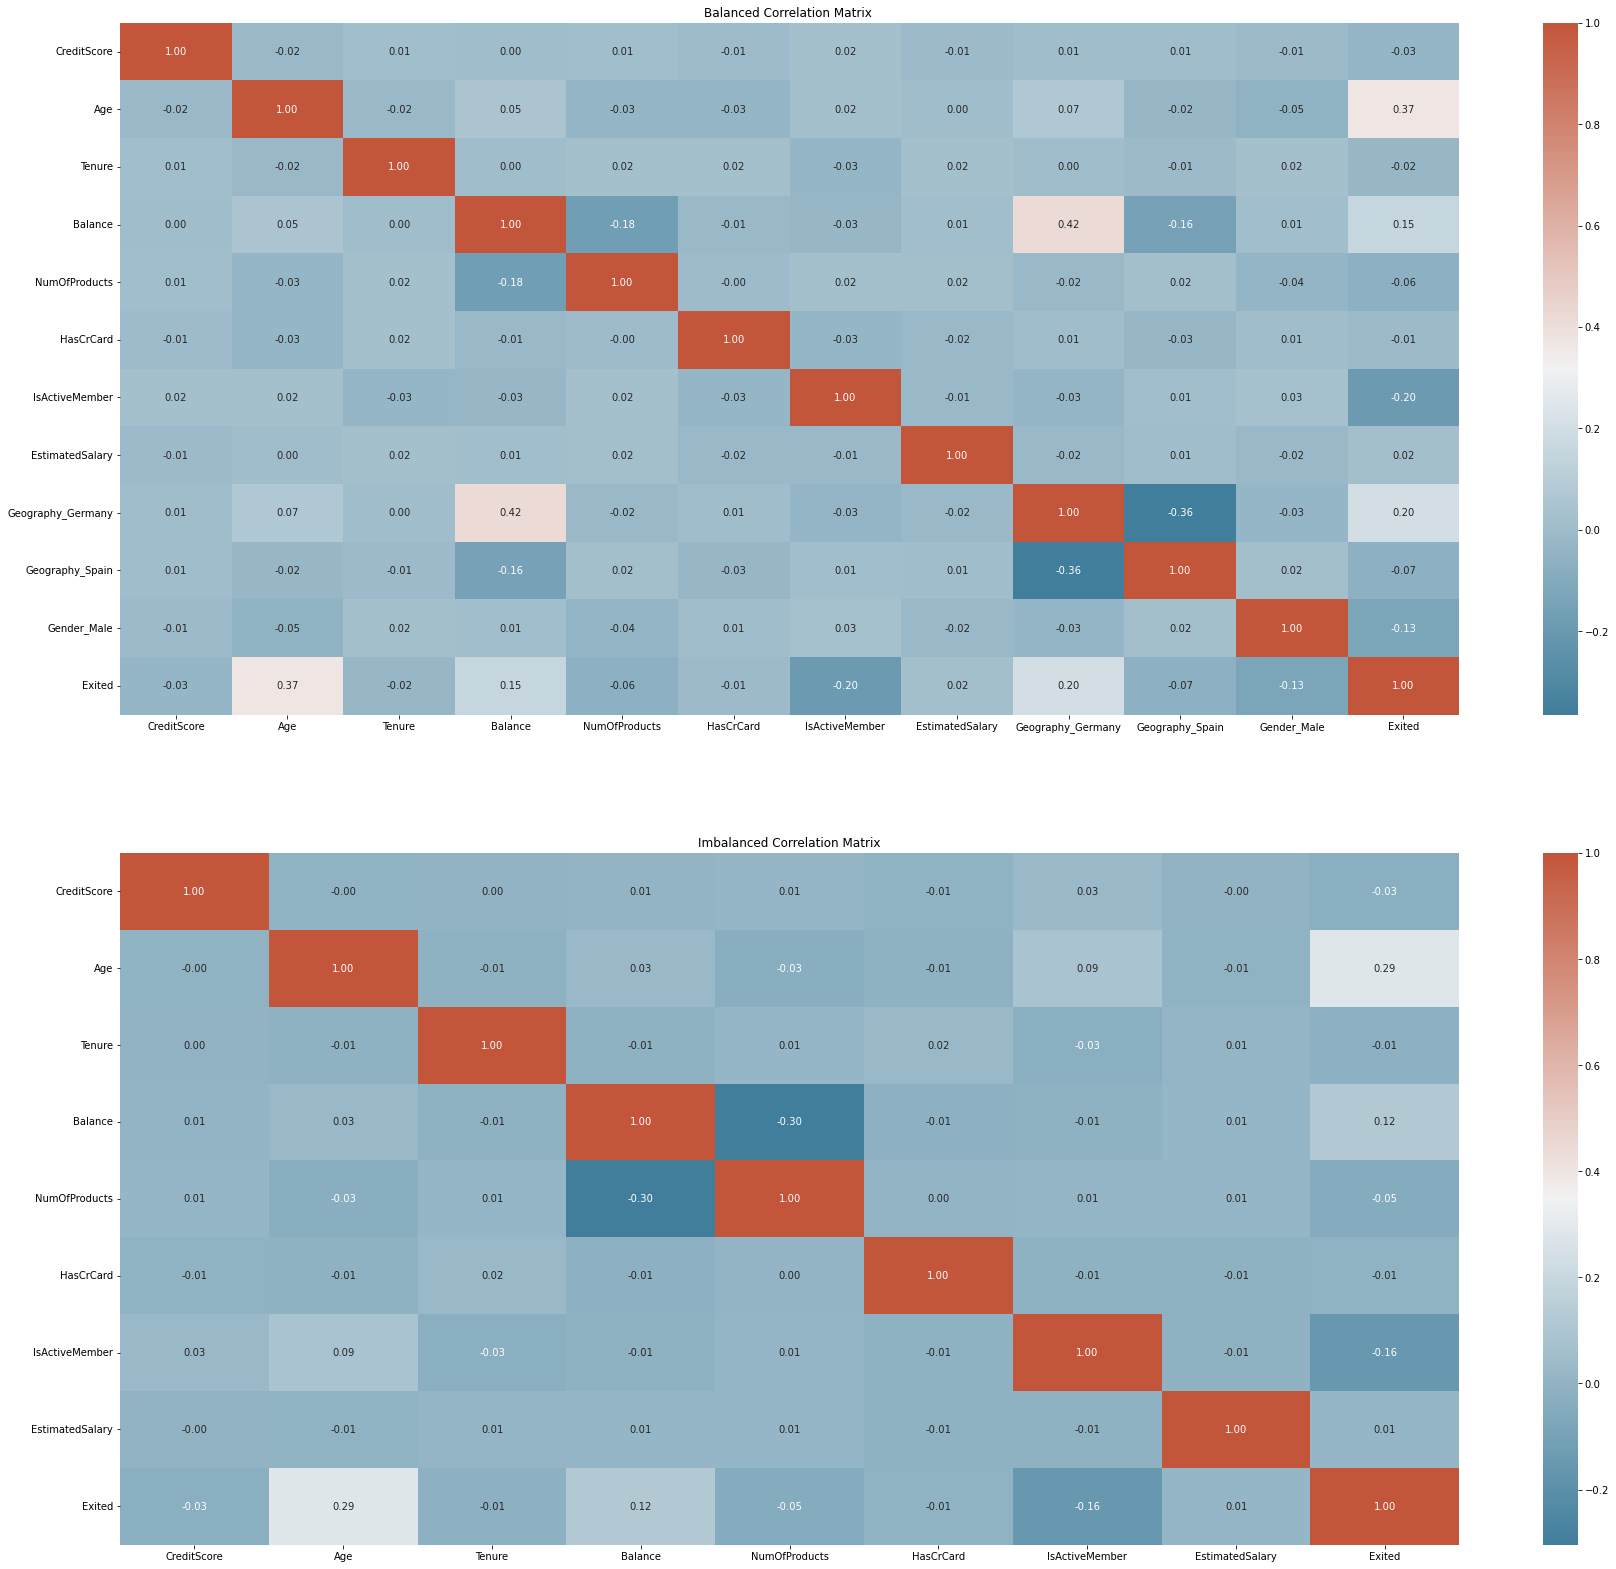

In [49]:
fig, axes = plt.subplots(2, 1, figsize=(30,28))

cmap=sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(df_bal_smote.corr(), annot=True, fmt=".2f", cmap = cmap, ax=axes[0])
axes[0].set_title("Balanced Correlation Matrix ",fontweight='light')

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap = cmap, ax=axes[1])
axes[1].set_title('Imbalanced Correlation Matrix', fontweight='light')

plt.show()

In [50]:
#Check for outliers for the influenced features (Age and Balance)

[]

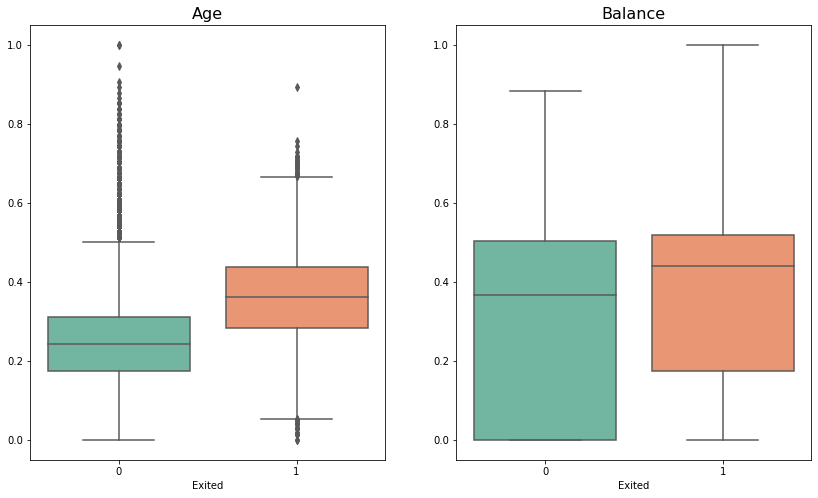

In [51]:
#check for outliers in influenced features
fig, axes = plt.subplots(1,2,figsize=(14,8))

high_correlation = ['Age', 'Balance']

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.boxplot(x='Exited', y=high_correlation[i], data=df_bal_smote, ax=ax, palette=sns.color_palette('Set2', 2))
    ax.set_ylabel(None)
    ax.set_title(label=high_correlation[i], fontsize=16, fontweight='light')
plt.plot()

In [ ]:
#As we can see there are outliers at both the ends of the Age boxplot. So removing them from our dataset

In [52]:
v_fraud = df_bal_smote[df_bal_smote['Exited']==1]['Age']

q75 = np.percentile(v_fraud, 75)
q25 = np.percentile(v_fraud, 25)
iqr = q75 - q25

v_lower, v_upper = q25-1.5*iqr, q75+1.5*iqr
outliers = [x for x in v_fraud if x > v_upper or x < v_lower]

print(str(len(outliers))+' '+str('Age')+' fraud outliers: '+str(outliers)+'\n')

df_bal_smote = df_bal_smote.drop(df_bal_smote.index[df_bal_smote['Age'].isin(outliers) & 
                                 df_bal_smote['Exited']==1])

55 Age fraud outliers: [0.6891891891891893, 0.040540540540540515, 0.7432432432432432, 0.02702702702702703, 0.0, 0.7162162162162162, 0.02702702702702703, 0.7567567567567568, 0.7162162162162162, 0.8918918918918919, 0.7027027027027029, 0.7027027027027029, 0.013513513513513542, 0.6756756756756757, 0.7027027027027029, 0.6756756756756757, 0.6756756756756757, 0.7162162162162162, 0.7162162162162162, 0.7162162162162162, 0.040540540540540515, 0.7162162162162162, 0.6756756756756757, 0.6756756756756757, 0.040540540540540515, 0.6756756756756757, 0.7027027027027029, 0.7297297297297298, 0.0, 0.7162162162162162, 0.6891891891891893, 0.7013903315224108, 0.051302232335996574, 0.05233091868973222, 0.6718204935143455, 0.6675803076141862, 0.017841104126525897, 0.05208943282860681, 0.017269224250054727, 0.04296835848226432, 0.6674895307262032, 0.6828085988857961, 0.676160387224473, 0.6723383682712992, 0.032883562413414814, 0.713673053015128, 0.01899478405532655, 0.6696280996735171, 0.6932842820560289, 0.0142

In [ ]:
##plotting again the balanced dataset after removing outliers

C:\Users\91948\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


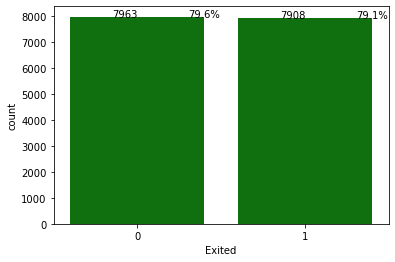

In [53]:
ax=sns.countplot(df_bal_smote['Exited'],color="Green")
for p in ax.patches:
    percent = '{:.1f}%'.format(100 * p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(percent,(x,y),ha='center')
    ax.annotate(y, (x - + p.get_width() +0.25, y+0.01))
plt.show()

In [54]:
#Model Building and & Performanace Evaluation

In [55]:
X = df_bal_smote.drop('Exited',axis='columns')
y = df_bal_smote['Exited']

In [56]:
#Using Train test split function, we split the balanced (SMOTE) data into training (80%) and testing data 

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [59]:
# Number of classes in training Data
y_train.value_counts()

0    6370
1    6326
Name: Exited, dtype: int64

In [62]:
#Function for Confusion Matrix plot
def plot_confusionmat(cm, lab, test_or_train):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    f = ax.matshow(cm, cmap=plt.cm.Pastel1)
    plt.title('Confusion Matrix of the ' + test_or_train +' Decision Tree \n')
    fig.colorbar(f)
    ax.set_xticklabels([''] + lab)
    ax.set_yticklabels([''] + lab)
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    s = [['TP','FN'], ['FP', 'TN']]
    for k in range(2):
        for l in range(2):
            plt.text(l,k, str(cm[k][l]))
    plt.show()

In [63]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

model = keras.Sequential([
    keras.layers.Dense(6, input_dim=11, activation='relu',kernel_initializer = 'he_uniform'),
    keras.layers.Dense(6, activation='relu',kernel_initializer = 'he_uniform'),
    keras.layers.Dense(1, activation='sigmoid',kernel_initializer = 'glorot_uniform')
])

model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
model_history =model.fit(X_train, y_train, epochs=100,validation_split=0.33,batch_size=10)

print(model.evaluate(X_test, y_test))

y_preds = model.predict(X_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))

Epoch 1/100
851/851 [==============================] - 4s 4ms/step - loss: 0.6622 - accuracy: 0.5931 - val_loss: 0.6315 - val_accuracy: 0.6415
Epoch 2/100
851/851 [==============================] - 3s 3ms/step - loss: 0.6173 - accuracy: 0.6652 - val_loss: 0.6044 - val_accuracy: 0.6776
Epoch 3/100
851/851 [==============================] - 3s 3ms/step - loss: 0.5910 - accuracy: 0.6867 - val_loss: 0.5757 - val_accuracy: 0.7064
Epoch 4/100
851/851 [==============================] - 3s 3ms/step - loss: 0.5620 - accuracy: 0.7040 - val_loss: 0.5528 - val_accuracy: 0.7217
Epoch 5/100
851/851 [==============================] - 3s 4ms/step - loss: 0.5450 - accuracy: 0.7194 - val_loss: 0.5549 - val_accuracy: 0.7284
Epoch 6/100
851/851 [==============================] - 4s 4ms/step - loss: 0.5350 - accuracy: 0.7342 - val_loss: 0.5369 - val_accuracy: 0.7384
Epoch 7/100
851/851 [==============================] - 3s 4ms/step - loss: 0.5240 - accuracy: 0.7385 - val_loss: 0.5217 - val_accuracy: 0.7384

Epoch 58/100
851/851 [==============================] - 3s 3ms/step - loss: 0.4372 - accuracy: 0.7917 - val_loss: 0.4499 - val_accuracy: 0.7785
Epoch 59/100
851/851 [==============================] - 3s 3ms/step - loss: 0.4372 - accuracy: 0.7918 - val_loss: 0.4568 - val_accuracy: 0.7780
Epoch 60/100
851/851 [==============================] - 3s 4ms/step - loss: 0.4371 - accuracy: 0.7914 - val_loss: 0.4534 - val_accuracy: 0.7792
Epoch 61/100
851/851 [==============================] - 3s 3ms/step - loss: 0.4363 - accuracy: 0.7924 - val_loss: 0.4432 - val_accuracy: 0.7833
Epoch 62/100
851/851 [==============================] - 4s 5ms/step - loss: 0.4366 - accuracy: 0.7904 - val_loss: 0.4477 - val_accuracy: 0.7802
Epoch 63/100
851/851 [==============================] - 4s 5ms/step - loss: 0.4376 - accuracy: 0.7936 - val_loss: 0.4429 - val_accuracy: 0.7823
Epoch 64/100
851/851 [==============================] - 3s 3ms/step - loss: 0.4369 - accuracy: 0.7919 - val_loss: 0.4432 - val_accuracy:

In [ ]:
#As we can see from the classification report, both exited and non-exited F1score are kind of equal, so we trained them with equal importance. And also we got descent accuracy.

In [ ]:
# Plotting the Train and Test Accuracy.

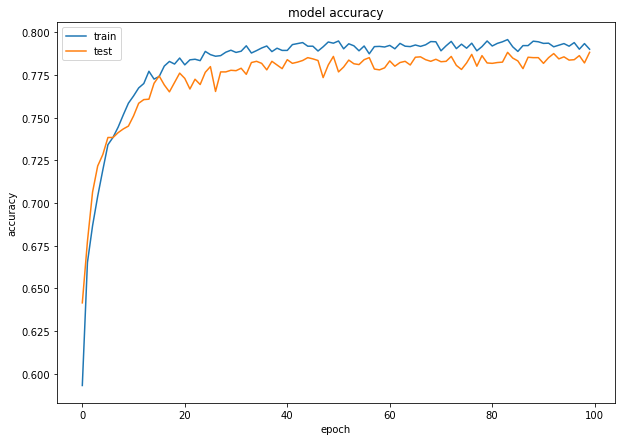

In [65]:
plt.figure(figsize=(10, 7))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
#Plotting the Train and Test Loss values.

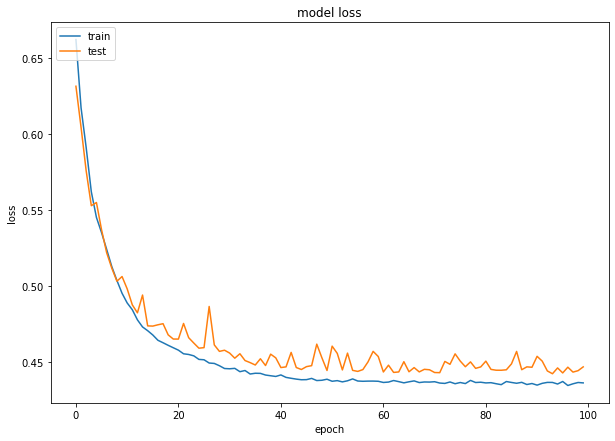

In [66]:
# summarize history for loss
plt.figure(figsize=(10, 7))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
##initializing our input as 2d array 
l1=[[600,50,2,80000,1,1,1,100000,0,0,0]]
predicting_test_df=pd.DataFrame(l1,columns=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain','Gender_Male'])
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

#scaling them same as we did for our dataset
predicting_test_df[cols_to_scale]=scaler.transform(predicting_test_df[cols_to_scale])

#predicting the target variable
print(model.predict(predicting_test_df) > 0.5)

1/1 [==============================] - 0s 56ms/step
[[ True]]


In [68]:
#Result: The customer has Exited

In [69]:
#Creating confusion matrix with Training and Testing prediction values

In [70]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

100/100 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [71]:
cm_test = confusion_matrix(y_test, y_pred)
cm_test

array([[1248,  345],
       [ 325, 1257]], dtype=int64)

In [72]:
y_train_pred = model.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

397/397 [==============================] - 1s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [73]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train

array([[5006, 1364],
       [1249, 5077]], dtype=int64)

C:\Users\91948\AppData\Local\Temp\ipykernel_536\2048104066.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + lab)
C:\Users\91948\AppData\Local\Temp\ipykernel_536\2048104066.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + lab)


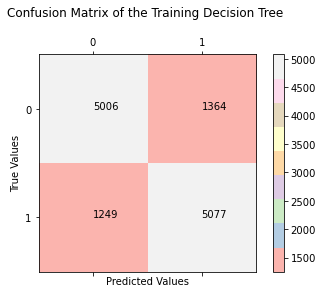

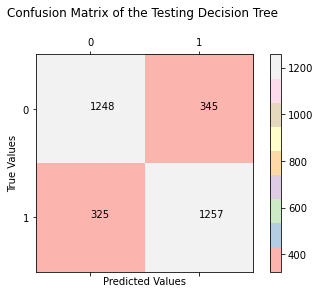

In [74]:
plot_confusionmat(cm_train, ["0","1"], "Training")
plot_confusionmat(cm_test, ["0","1"], "Testing")